In [1]:
#Import required packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

#Read in data file
ccc_data = pd.read_csv(r'C:\Users\Mike\Documents\Grad School 2021\DSC-609 Machine Learning\BankChurners.csv')

ccc_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [2]:
# Data cleansing and preprocessing

ccc_data = ccc_data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                         'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], axis = 1)


# Drop rows with 'Unknown'
ccc_data = ccc_data[ccc_data['Education_Level'] != 'Unknown']
ccc_data = ccc_data[ccc_data['Marital_Status'] != 'Unknown']
ccc_data = ccc_data[ccc_data['Income_Category'] != 'Unknown']

# Re-code ordinals
ccc_data['Education_Level'].replace(to_replace = 'Uneducated', value = 0, inplace = True)
ccc_data['Education_Level'].replace(to_replace = 'High School', value = 1, inplace = True)
ccc_data['Education_Level'].replace(to_replace = 'College', value = 2, inplace = True)
ccc_data['Education_Level'].replace(to_replace = 'Graduate', value = 3, inplace = True)
ccc_data['Education_Level'].replace(to_replace = 'Post-Graduate', value = 4, inplace = True)
ccc_data['Education_Level'].replace(to_replace = 'Doctorate', value = 5, inplace = True)

ccc_data['Income_Category'].replace(to_replace = 'Less than $40K', value = 0, inplace = True)
ccc_data['Income_Category'].replace(to_replace = '$40K - $60K', value = 1, inplace = True)
ccc_data['Income_Category'].replace(to_replace = '$60K - $80K', value = 2, inplace = True)
ccc_data['Income_Category'].replace(to_replace = '$80K - $120K', value = 3, inplace = True)
ccc_data['Income_Category'].replace(to_replace = '$120K +', value = 4, inplace = True)

ccc_data['Card_Category'].replace(to_replace = 'Blue', value = 0, inplace = True)
ccc_data['Card_Category'].replace(to_replace = 'Silver', value = 1, inplace = True)
ccc_data['Card_Category'].replace(to_replace = 'Gold', value = 2, inplace = True)
ccc_data['Card_Category'].replace(to_replace = 'Platinum', value = 3, inplace = True)

# Get dummies for gender and marital status
ccc_data = pd.get_dummies(ccc_data, columns = ['Gender','Marital_Status'])

# Re-code target class
ccc_data['Attrition_Flag'].replace(to_replace = 'Existing Customer', value = 'N', inplace = True)
ccc_data['Attrition_Flag'].replace(to_replace = 'Attrited Customer', value = 'Y', inplace = True)

ccc_data

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,N,45,3,1,2,0,39,5,1,3,...,1.335,1144,42,1.625,0.061,0,1,0,1,0
1,N,49,5,3,0,0,44,6,1,2,...,1.541,1291,33,3.714,0.105,1,0,0,0,1
2,N,51,3,3,3,0,36,4,1,0,...,2.594,1887,20,2.333,0.000,0,1,0,1,0
4,N,40,3,0,2,0,21,5,1,0,...,2.175,816,28,2.500,0.000,0,1,0,1,0
5,N,44,2,3,1,0,36,3,1,2,...,1.376,1088,24,0.846,0.311,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10120,N,54,1,1,2,0,34,5,2,0,...,0.660,15577,114,0.754,0.151,0,1,0,0,1
10121,N,56,1,3,0,0,50,4,1,4,...,0.570,14596,120,0.791,0.164,1,0,0,0,1
10122,N,50,2,3,1,0,40,3,2,3,...,0.703,15476,117,0.857,0.462,0,1,0,0,1
10124,Y,44,1,1,0,0,36,5,3,4,...,0.819,10291,60,0.818,0.000,1,0,0,1,0


In [3]:
# Split data into training and testing, using stratify parameter to ensure proprtional target class representation

predictors = ccc_data.drop(['Attrition_Flag'], axis = 1)
target = ccc_data['Attrition_Flag']

predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, stratify = target, test_size = 0.2, random_state = 2)

print("training set shape:", predictors_train.shape)
print('Test set shape:', predictors_test.shape)

training set shape: (5664, 22)
Test set shape: (1417, 22)


In [4]:
# Create the random forest classifier 

RF_ccc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 2)

skfold = StratifiedKFold(n_splits = 5)

RF_ccc_scores = cross_val_score(RF_ccc, predictors_train, target_train, cv = skfold)

foldnum = 0
for val in RF_ccc_scores:
    foldnum += 1
    print('Cross-Validation Score, Fold #',foldnum,':\t %0.4f' % val)
    
print('Average CV score on training set: {:.3f}'.format(RF_ccc_scores.mean()))

Cross-Validation Score, Fold # 1 :	 0.9100
Cross-Validation Score, Fold # 2 :	 0.9117
Cross-Validation Score, Fold # 3 :	 0.9144
Cross-Validation Score, Fold # 4 :	 0.9179
Cross-Validation Score, Fold # 5 :	 0.9134
Average CV score on training set: 0.913


In [5]:
# Nearest neighbors uses concept of distance, so we need features on a similar scale to prevent feature dominance

minmax_scaler = MinMaxScaler()
predictors_train_scaled = minmax_scaler.fit_transform(predictors_train)
predictors_test_scaled = minmax_scaler.transform(predictors_test)

neighborqty = [1,2,3,4,5,6,7,8,9,10,11,12]

print('K-nn scores using uniform weighting')
for qty in neighborqty:
    knn_ccc = KNeighborsClassifier(n_neighbors = qty)
    knn_ccc.fit(predictors_train_scaled, target_train)
    print("Test set score for",qty,"nearest neighbors: {:.3f}".format(
        knn_ccc.score(predictors_test_scaled, target_test)))
    
print('\nK-nn scores using distance weighting')
for qty in neighborqty:
    knn_ccc = KNeighborsClassifier(n_neighbors = qty, weights = 'distance')
    knn_ccc.fit(predictors_train_scaled, target_train)
    print("Test set score for",qty,"nearest neighbors: {:.3f}".format(
        knn_ccc.score(predictors_test_scaled, target_test)))

K-nn scores using uniform weighting
Test set score for 1 nearest neighbors: 0.874
Test set score for 2 nearest neighbors: 0.878
Test set score for 3 nearest neighbors: 0.882
Test set score for 4 nearest neighbors: 0.879
Test set score for 5 nearest neighbors: 0.884
Test set score for 6 nearest neighbors: 0.879
Test set score for 7 nearest neighbors: 0.884
Test set score for 8 nearest neighbors: 0.881
Test set score for 9 nearest neighbors: 0.884
Test set score for 10 nearest neighbors: 0.880
Test set score for 11 nearest neighbors: 0.886
Test set score for 12 nearest neighbors: 0.878

K-nn scores using distance weighting
Test set score for 1 nearest neighbors: 0.874
Test set score for 2 nearest neighbors: 0.874
Test set score for 3 nearest neighbors: 0.883
Test set score for 4 nearest neighbors: 0.885
Test set score for 5 nearest neighbors: 0.884
Test set score for 6 nearest neighbors: 0.888
Test set score for 7 nearest neighbors: 0.885
Test set score for 8 nearest neighbors: 0.883
Tes

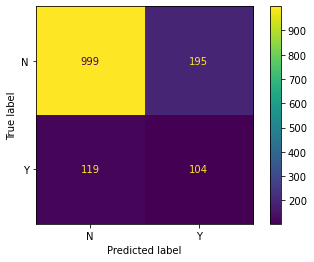

In [6]:
#Create confusion matrix on test data
RF_ccc.fit(predictors_train_scaled, target_train)
Forest_predictions = RF_ccc.predict(predictors_test)

Forest_confusion = confusion_matrix(target_test, Forest_predictions, labels = RF_ccc.classes_)

Forest_confusion_table = ConfusionMatrixDisplay(confusion_matrix = Forest_confusion, display_labels = RF_ccc.classes_)

plt = Forest_confusion_table.plot()


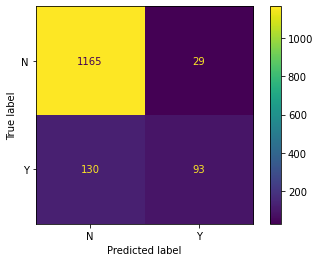

In [7]:
#Re-fit the K-nn model with the highest testing score and create confusion matrix on test data

knn_ccc = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn_ccc.fit(predictors_train_scaled, target_train)

knn_predictions = knn_ccc.predict(predictors_test_scaled)

knn_confusion = confusion_matrix(target_test, knn_predictions, labels = knn_ccc.classes_)

knn_confusion_table = ConfusionMatrixDisplay(confusion_matrix = knn_confusion, display_labels = knn_ccc.classes_)

plt = knn_confusion_table.plot()